# General Notebook BSc Thesis


#### To be able to manipulate root files using python we can import uproot 

In [1]:
import uproot
import numpy as np #math and science package
import scipy as sp #math and science package
import awkward as ak #root files are usuallt awkward arrays 
import matplotlib.pyplot as plt #plot stuff

#### To open the ROOT data file, we use uproot.open(path). Moreover, .keys() show the keys of the file 

In [2]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
file.keys() #Here we can see the keys of the file (index)

['MuonTree_Zmumu;1', 'MuonTree_ZeroBias;1']

#### With file["keyname"], we can access the different keys (trees) and store them as variables. So far I have ZeroBias, which refers to background data (noise) used as a reference, and Zmumu, which includes data from Z $\longrightarrow \mu \mu$ events.

#### Moreover, .show() will print the different elements that the tree includes. If we want to save one of these elements as a variable, we must type .array() at the end. This way we will obtain a variable that contains the numeric data stored as an array. By default the type of the array is awkward array.

#### An awkward array is a type of data that contains elements of different sizes that are too "weird" to be handled using standard numpy arrays.

#### The function ak.flatten will flatten the array, meaning that it will remove one index. For example: say we have the awkward array a=([1,1],[1,4,5,6],[1,4,4]). If we use ak.flatten(a) the result will be (1,1,1,4,5,6,1,4,4). This is important for plotting.

In [3]:
tree=file["MuonTree_Zmumu;1"] #here we assign one of the keys to a variable 
tree.show() #by saying .show we display the list below, where we can see the datasets contained by "tree"

eta = tree["LVL1Muon_eta"].array()
eta=ak.flatten(eta) #these two steps seems to be necessary to get a nice array of data that we can plot

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_e               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_type            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_charge          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_author          | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_quality         | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_passedIDCuts    | std::vector<bool>        | AsJagged(AsDtype('bool'), h...
jTower_et            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
jTower_et_MeV        | std::

##### "Eta ($\eta$)" is a variable called Pseudorapidity and it represents a location of the ATLAS detector. 
#### $\eta$=0 means the particle went up with respect to the collision point and direction of movement, if $\eta$ is big, around 4 or more, then the direction of the produced muon has barely changed with respect to the collision

Wikipedia: https://en.wikipedia.org/wiki/Pseudorapidity

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pseudorapidity_plot.svg/800px-Pseudorapidity_plot.svg.png width=300>
<img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.bnl.gov%2Ftoday%2Fbody_pics%2F2015%2F06%2Fevent_display_run266904-hr.jpg&f=1&nofb=1&ipt=5efb974c4347d361ea100f791f9edc609db7ba627c2d357422afb41f7060f024 width=400>

In [4]:
print(eta) #see the values
type(eta) #see the type

[1.05, -1.39, 1.64, -2.28, 1.12, 2.05, ..., -0.929, -0.602, 0.875, 0.863, 1.96]


awkward.highlevel.Array

#### My first goal is to plot the different data included inside the arrays. Additionally, the idea is to plot ZeroBias and Z $\longrightarrow \mu \mu$ together so they're easy to compare. To plot will include errorbars, legend and other fancy stuff.

#### Also, the quality of the muons is a relevant parameter. Quality states how "nice" is the event. Quality=0 should be the best muons recorded, so we should expect more accurate results if we plot these. To be able to plot only Quality=0 events, I've developed a set of functions that take an array and select only quality 0 events.

#### In the script below we can see the results:


In [5]:
%run all_basic_plots.py

ImportError: cannot import name 'invariant_mass' from 'my_functions' (/home/ruben/Escritorio/BachelorThesisRuben/CodeThesis/my_functions.py)

#### Now let's try to extract different information: how many muons are involved in every event (collision)? We aim to create a histogram that relates number of muons per collision in x-axis and counts in y-axis. To do so, I created a function that counts the length of each element.

#### See results:

    1. Function ak_element_lenght_counter(data)
    2. File Number_elements_per_event

#### Let's execute the full scripts to see the results

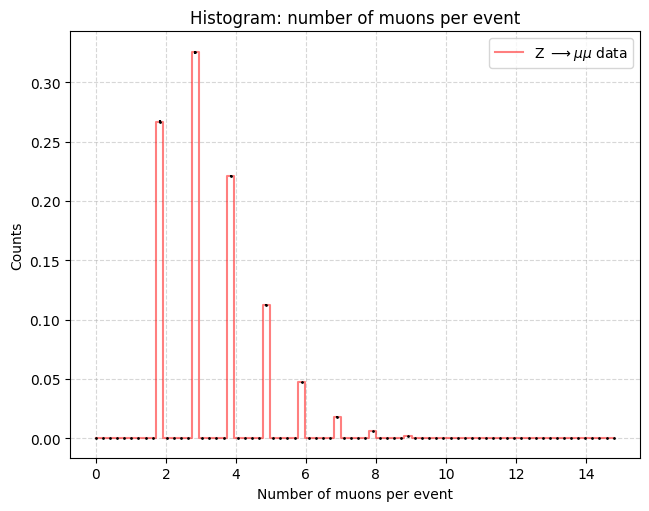

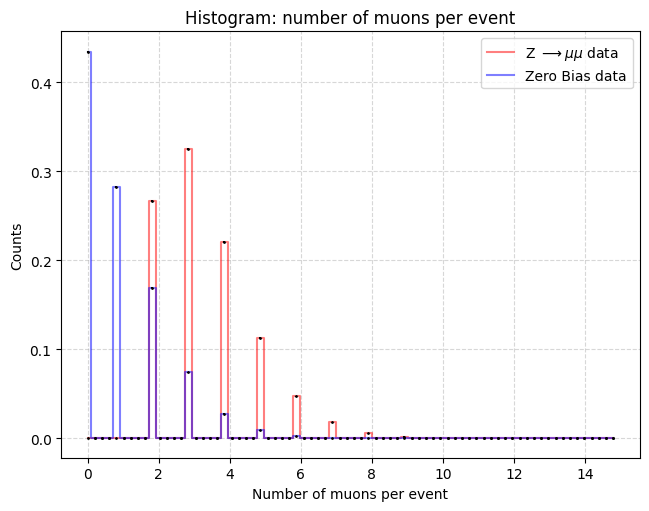

Only 21.265 % of the data has been selected


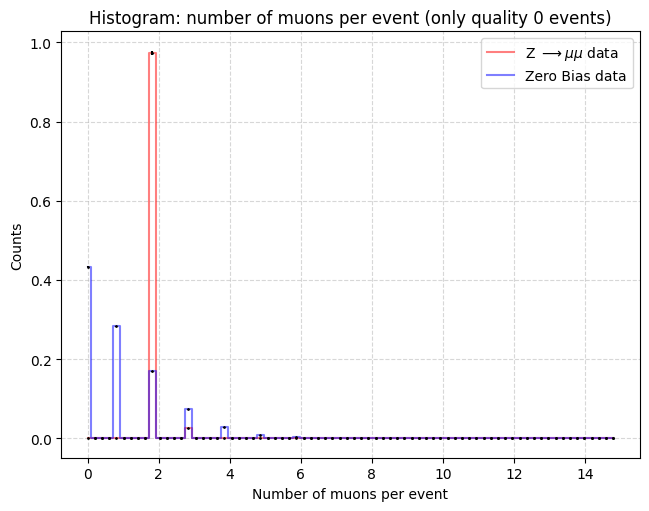

In [6]:
%run number_elements_per_event.py

#### Next goal is to reconstruct the Z boson peak from the data. The idea is that from eta, phi and p_T of the muons we should be able to calculate the invariant mass of the Z boson, which should be arround 90 GeV/c
See: https://en.wikipedia.org/wiki/Invariant_mas

See: https://cds.cern.ch/record/2909648/files/main.pdf

#### First of all, I created a function that plots the Z peak only for events involving two muons. We can see how the results seem to be correct, and how the quality=0 data yields a sharper peak arround the theoretical value. This function has been deleted because I'll create another one that can handle events with more than 2 muons.


#### Now the goal is to extend this function to events with more than 2 elements recorded. This means that the detection systems passed more than 2 muons as possible candidates, however only 2 of them can be the real muons involved. Therefore I had to develop a function that discriminates which pair of muons should we keep.

100%|██████████| 200000/200000 [01:15<00:00, 2649.29it/s]


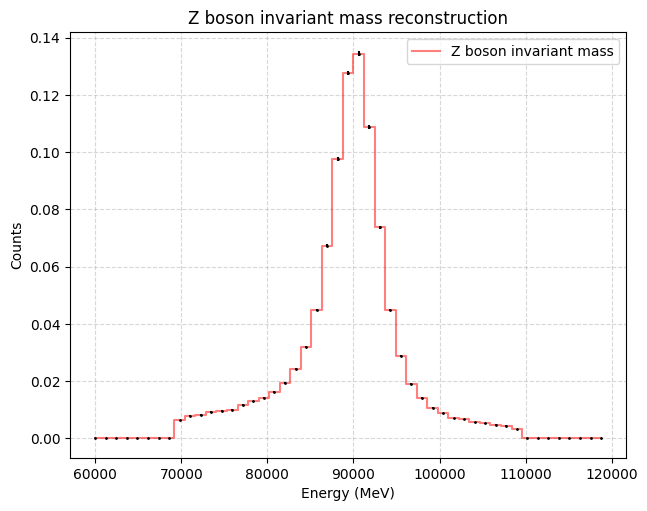

Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected


100%|██████████| 42530/42530 [00:10<00:00, 4047.06it/s]


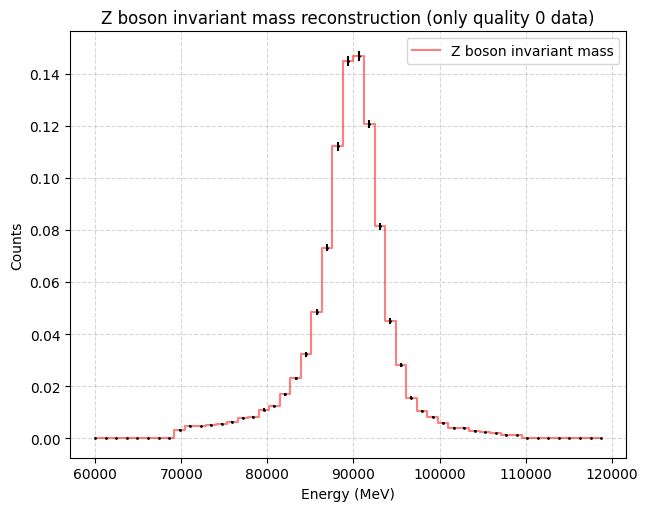

In [7]:
%run Z_peak_general.py

#### Next thing I've done is to develop the delta_r, delta_eta and delta_phi functions. They compute the "distance" between two muons. The typical values for delta_r are approximately 3 or pi. This seems to be correct since delta_eta is usually small and delta_phi is usually close to pi, because the collisions happen roughly in a plane perpendicular to the beam direction of movement. 

In [8]:
%run delta_r_test.py

The computed delta R values are: [1.41421356 1.41421356 2.23606798]


##### My next task is to implement a function that selects the data that is only above a certain treshold and computes the fraction of data that has been selected. In my case, I want to select the events where muons are above p_T>20000MeV and also multiply this by a scaling factor to get a temportal rate in Hz. My scaling factor is (2340/3564)*40000000. The first term takes into consideration that only 2340 out of 3564 bunches are "filled" (containing protons) when the LHC is running. 40MHz is the bunch crossing rate. So my scaling factor is the filled bunch crossing rate (how many filled bunches collide with each other per second). 

##### It seems like the expected results should be around 10kHz, for Zero Bias muons above 14000MeV

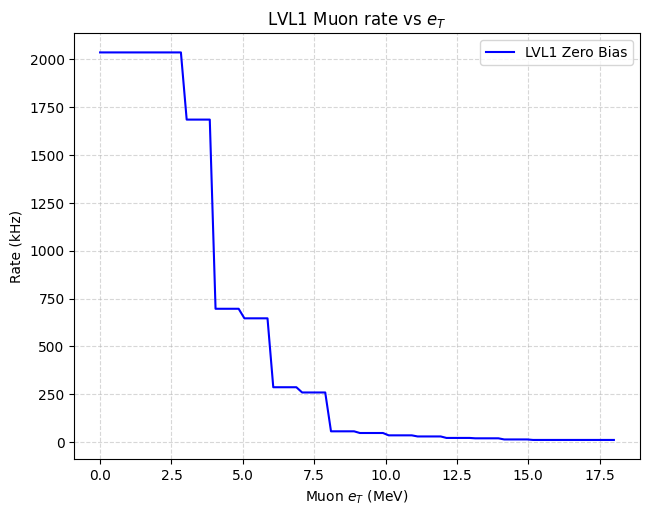

The estimated rate for a threshold of 14000 MeV is 20.616161616161616 kHz. This is 2.0616161616161617 times bigger than the expected value, 10 kHz


In [9]:
%run rate_calculation.py

##### As we can see, I'm running into trouble because the calculated rate is 2 times bigger than the expected one. Don't know why yet.

##### New challenge: plot and understand the jTower data. jTower data refers to the calorimeter "pixels" (a pixel is one little detector), so each entry is the value mesured by a pixel in the ATLAS calorimeter. This data is around 6gb so I can't open it directly with this computer (not enough RAM). What I did is create a function that slices the data in smaller pieces, then calculates a histogram for every piece and at the end adds al histograms togehter. It also plots the histogram if we want. Here're the results: 

Note: the e_T histogram starts at 10⁴. There were so many events at low e_T that the data was not meaningful.

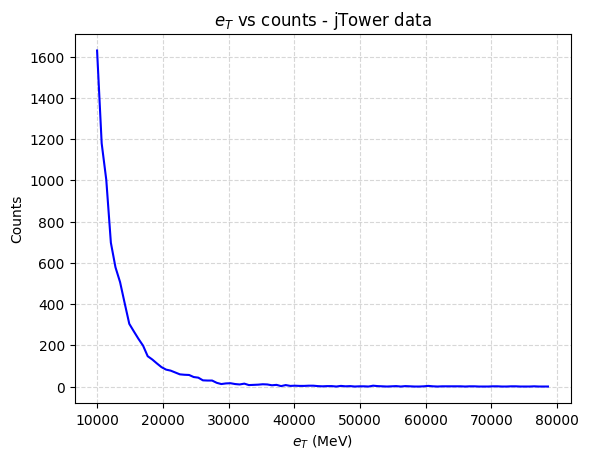

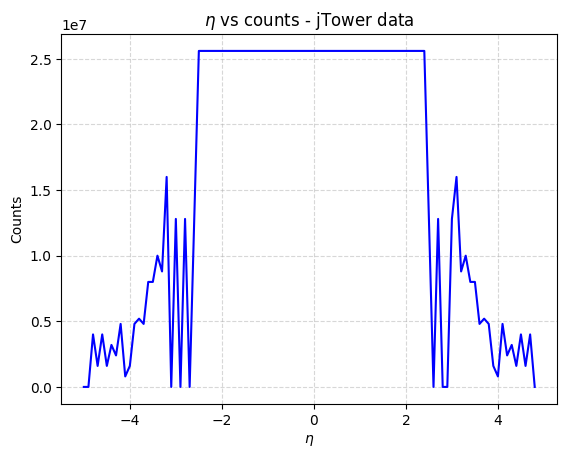

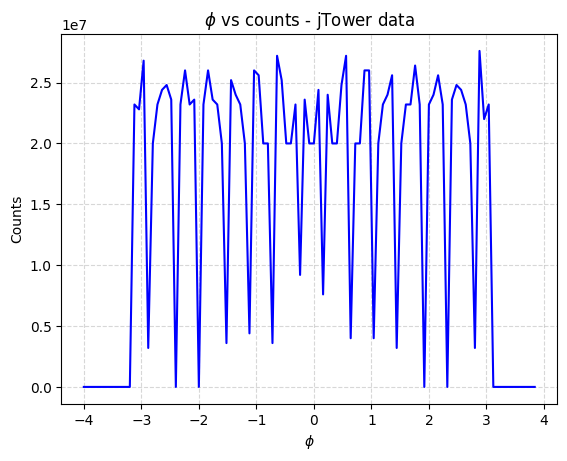

In [10]:
%run jTower_basic_plots.py

##### The fun never stops: now my goal is to "isolate" the muons. To do this, the idea is to compute the delta R between every muon and every calorimeter pixel (jTower elements). To begin with, I'm going to create a function that generates pairs of data so that I can compute the dr between an event an all the jTower pixels. This function is actually integrated inside the final isolation function. Then I want to take into account only the jTower pixels that are actually close to the muons, that's why I need to implement a dr threshold that sets the upper limit for delta r. This takes the jTower pixels that are inside a "cone" of lenght delta r around the muon. Finally I'm going to sum the calorimeter energies that were measured in those selected pixels. This should give a good estimation of the energy of the muon. Then that needs to be repeated for every event. This function perfroms a massive amount of calculations and, even though I've done my best trying to optimise it, it still takes a long time to run. For the ZeroBias data, it takes around 5-10 minutes (because the bast majority of events are empty), but for Z to mu mu data, where no events are empty and each event contains around 1-5 muons typically, the function is taking around 1h to run. Still this is a big improvement, because on my first attempt the function took 24h to run on the ZeroBias data. Let's run below a test using a small sample of the data so it runs in a decent amount of time.

Non-empty elements: 15495


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


Non-empty elements: 200000


100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


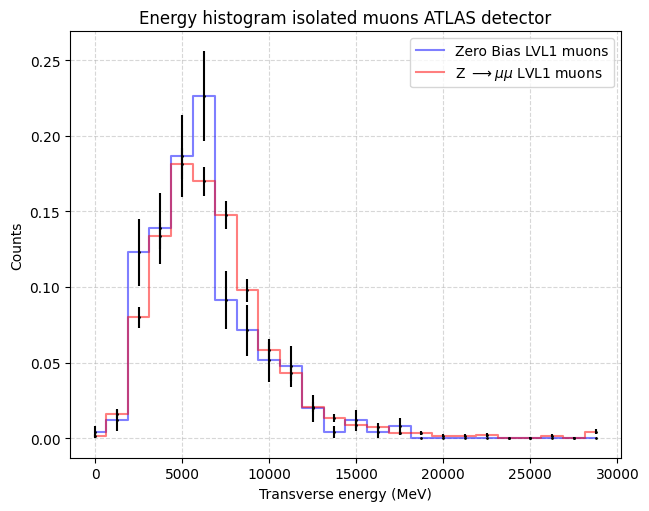

Some of the isolated energies for Z to mumu LVL1 muons are: [np.float32(5075.0), np.float32(5625.0)] and [np.float32(4775.0)] . The mean value is 7557.811626607043 MeV
Non-empty elements: 113235


100%|██████████| 4/4 [00:16<00:00,  4.08s/it]


Non-empty elements: 200000


100%|██████████| 2/2 [01:10<00:00, 35.00s/it]


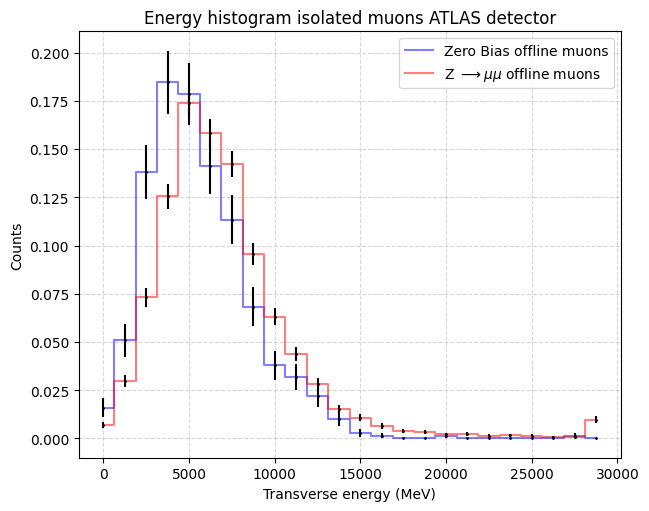

Some of the isolated energies for Z to mumu offline muons are: [np.float32(6650.0), np.float32(6225.0)] and [np.float32(3750.0), np.float32(4775.0)] . The mean value is 7808.302706314735 MeV
Non-empty elements: 113235


100%|██████████| 4/4 [00:17<00:00,  4.41s/it]


Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected
Non-empty elements: 42530


100%|██████████| 2/2 [00:46<00:00, 23.39s/it]


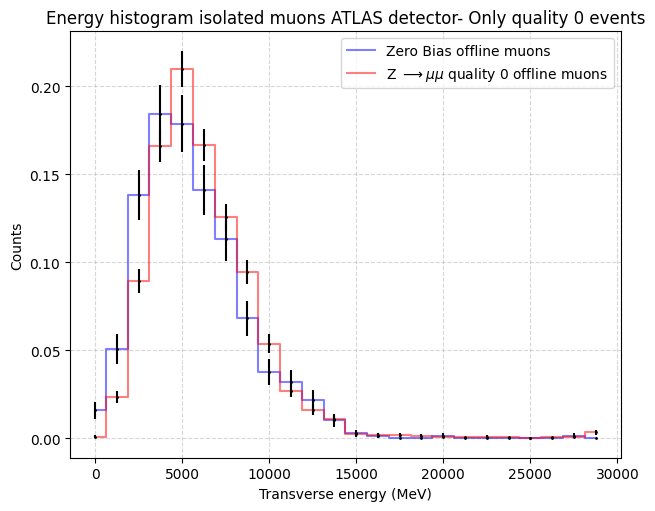

Some of the isolated energies for Z to mumu quality 0 offline muons are: [np.float32(6650.0), np.float32(6225.0)] and [np.float32(3750.0), np.float32(4775.0)] . The mean value is 6952.100840336135 MeV


In [1]:
%run jTower_isolation_test.py

2. Ratio of isolation energy / muon pt
4. Different dr
7. Try to apply numba?